In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt

# Word Count

## Pegasus

In [ ]:
peg_df=pd.read_csv("/content/drive/MyDrive/DISSERTATION/Dataset/test_peg_v4.csv")

In [ ]:
peg_df['abstract_word_count'] = peg_df['abstract'].apply(lambda x: len(str(x).split()))
peg_df['plain_language_summary_word_count'] = peg_df['plain language summary'].apply(lambda x: len(str(x).split()))
peg_df['generated_summary_word_count'] = peg_df['generated_summary'].apply(lambda x: len(str(x).split()))

# Average word count for each column
peg_avg_abstract_count = peg_df['abstract_word_count'].mean()
peg_avg_pls_count = peg_df['plain_language_summary_word_count'].mean()
peg_avg_generated_summary_count = peg_df['generated_summary_word_count'].mean()


print(f"Average word count for 'abstract': {peg_avg_abstract_count}")
print(f"Average word count for 'plain_language_summary': {peg_avg_pls_count}")
print(f"Average word count for 'generated_summary': {peg_avg_generated_summary_count}")

Average word count for 'abstract': 194.752
Average word count for 'plain_language_summary': 177.563
Average word count for 'generated_summary': 142.42


## BART

In [ ]:
bart_df=pd.read_csv("/content/drive/MyDrive/DISSERTATION/Dataset/test_bart_v2.csv")

In [ ]:
bart_df['abstract_word_count'] = bart_df['abstract'].apply(lambda x: len(str(x).split()))
bart_df['plain_language_summary_word_count'] = bart_df['plain language summary'].apply(lambda x: len(str(x).split()))
bart_df['generated_summary_word_count'] = bart_df['generated_summary'].apply(lambda x: len(str(x).split()))

# Average word count for each column
bart_avg_abstract_count = bart_df['abstract_word_count'].mean()
bart_avg_pls_count = bart_df['plain_language_summary_word_count'].mean()
bart_avg_generated_summary_count = bart_df['generated_summary_word_count'].mean()


print(f"Average word count for 'abstract': {bart_avg_abstract_count}")
print(f"Average word count for 'plain_language_summary': {bart_avg_pls_count}")
print(f"Average word count for 'generated_summary': {bart_avg_generated_summary_count}")

Average word count for 'abstract': 194.752
Average word count for 'plain_language_summary': 177.563
Average word count for 'generated_summary': 160.065


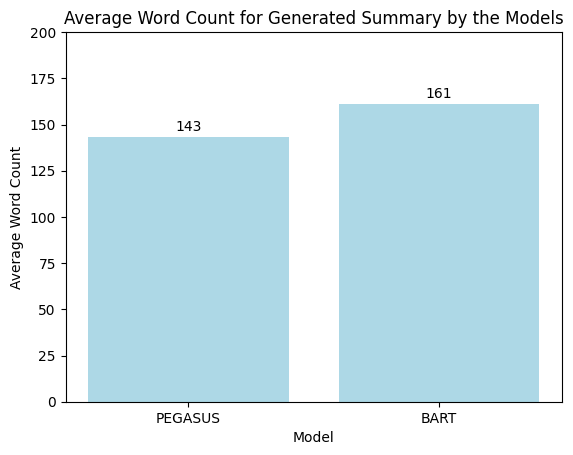

In [ ]:
model_names = ['PEGASUS', 'BART']
average_generated_summary_word_counts = [math.ceil(peg_avg_generated_summary_count), math.ceil(bart_avg_generated_summary_count)]  # Replace with your actual average word counts

# Bar Chart
plt.bar(model_names, average_generated_summary_word_counts, color='lightblue')

plt.title('Average Word Count for Generated Summary by the Models')
plt.xlabel('Model')
plt.ylabel('Average Word Count')
plt.ylim(0, 200)
for i, value in enumerate(average_generated_summary_word_counts):
    plt.text(i, value + 2, str(value), ha='center', va='bottom')

# Save the plot
plt.savefig('average_word_count_by_model.png')

# Show the plot
plt.show()


# Check for Sentence Repetition

In [ ]:
def check_repetition(summary):
    sentences = summary.split('. ')
    unique_sentences = set(sentences)
    if len(sentences) != len(unique_sentences):
        return 1
    else:
        return 0

## Pegasus

In [ ]:
peg_df=pd.read_csv("/content/drive/MyDrive/DISSERTATION/Dataset/test_peg_v4.csv")

In [ ]:
peg_df['repetition'] = peg_df['generated_summary'].apply(check_repetition)

In [ ]:
peg_df['repetition'].value_counts()

,count
repetition,
0,679
1,321


In [ ]:
peg_value_counts=peg_df['repetition'].value_counts()

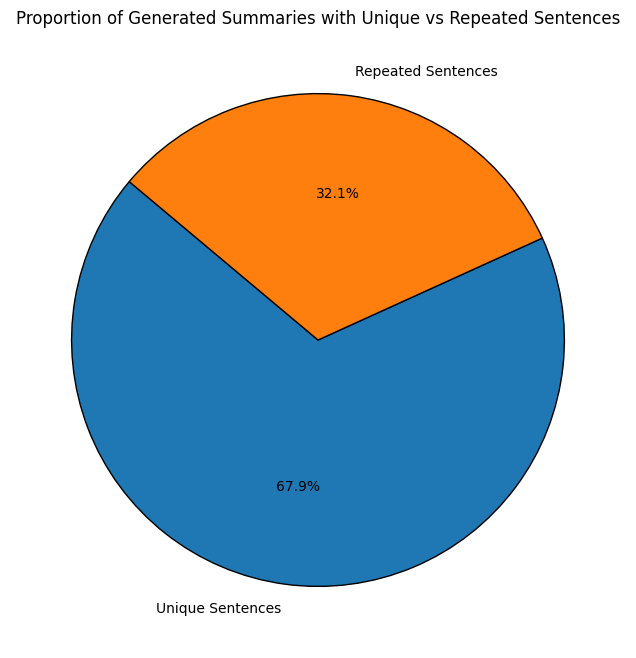

In [ ]:
#Pie Chart
labels = ['Unique Sentences', 'Repeated Sentences']
counts = [peg_value_counts.get(0,0), peg_value_counts.get(1,0)]


plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Generated Summaries with Unique vs Repeated Sentences')

#Save the Chart
plt.savefig('pegasus_repetition.png')

# Show the chart
plt.show()


## BART

In [ ]:
bart_df=pd.read_csv("/content/drive/MyDrive/DISSERTATION/Dataset/test_bart_v2.csv")

In [ ]:
bart_df['repetition'] = bart_df['generated_summary'].apply(check_repetition)

In [ ]:
bart_df['repetition'].value_counts()

,count
repetition,
0,1000
